In [1]:
from plotly.offline import init_notebook_mode, iplot
import numpy as np

In [2]:
import plotly 
plotly.tools.set_credentials_file(username='cdesio88', api_key='qhPfEEFgqcHRbYWB17Yc')

init_notebook_mode(connected=True)

### execute this cell to load files on server

In [3]:
detfile = "utilities/km3net_jul13_90m.detx"

In [11]:
nue_st_file = "utilities/km3_v4_nuecc_1.evt.JTE.aa.root"
numu_st_file = "utilities/km3_v4_numucc_1_B.evt.aa.root"

nue_100ns_4hits_file = "utilities/km3_v4_nuecc_1.evt_st_100ns_4hits.JTE.aa.root"
nue_reco_file = "utilities/km3_v4_nuecc_1.evt.JEnergy.aa.root"

numu_100ns_4hits_file = "utilities/km3_v4_numucc_1.evt_st_100ns_4hits.JTE.aa.root"
numu_reco_file = "utilities/km3_v4_nuecc_1.evt.JEnergy.aa.root"

muatm_file = "utilities/km3net_jul13_90m_muatm10T1.km3_v5r2.evt.JTE.aa.root"

### import trees from `aanet`files

In [47]:
numu_file = "./utilities/km3_v4_numuCC_1.evt.JTE.aa.root"
nue_file = "./utilities/km3_v4_nueCC_1.evt.JTE.root.aa.root"

In [5]:
from detector_positions import structured_positions
doms, pmts = structured_positions(detfile)

In [6]:
from detector_plot_preparation import plot_simulated_evts

In [7]:
import detector_plot_preparation
reload(detector_plot_preparation)

<module 'detector_plot_preparation' from 'detector_plot_preparation.pyc'>

In [19]:
doms_hit_numu, norm_times_numu, muon_positions = plot_simulated_evts(numu_file,
                                                                              detfile, "numu")

trees correctly loaded


In [50]:
doms_hit_nue, norm_times_nue, electron_positions = plot_simulated_evts(nue_file,
                                                                              detfile, "nue")

trees correctly loaded


In [12]:
doms_hit_numu, norm_times_numu, muon_positions = plot_simulated_evts(numu_st_file,
                                                                              detfile, "numu")

trees correctly loaded


In [19]:
doms_hit_nue, norm_times_nue, electron_positions = plot_simulated_evts(nue_st_file, 
                                                                              detfile, "nue")

trees correctly loaded


### plot the events using `plotly`

In [12]:
from utility_plot_functions import plotly_evt_plot

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go


fig = plotly_evt_plot(0, doms_hit_numu, norm_times_numu, muon_positions)
py.iplot(fig)

### plot the detector using `plot.ly`

In [15]:
from utility_plot_functions import plotly_detector_plot

In [16]:
coord_origin = np.asarray((13.887,6.713,405.932))

In [17]:
import plotly.plotly as py
import plotly.graph_objs as go
fig = plotly_detector_plot()
py.iplot(fig)

### utility functions definitions for matplotlib

### plot the events

In [20]:
from utility_plot_functions import mpl_plot_detector

In [21]:
%matplotlib notebook

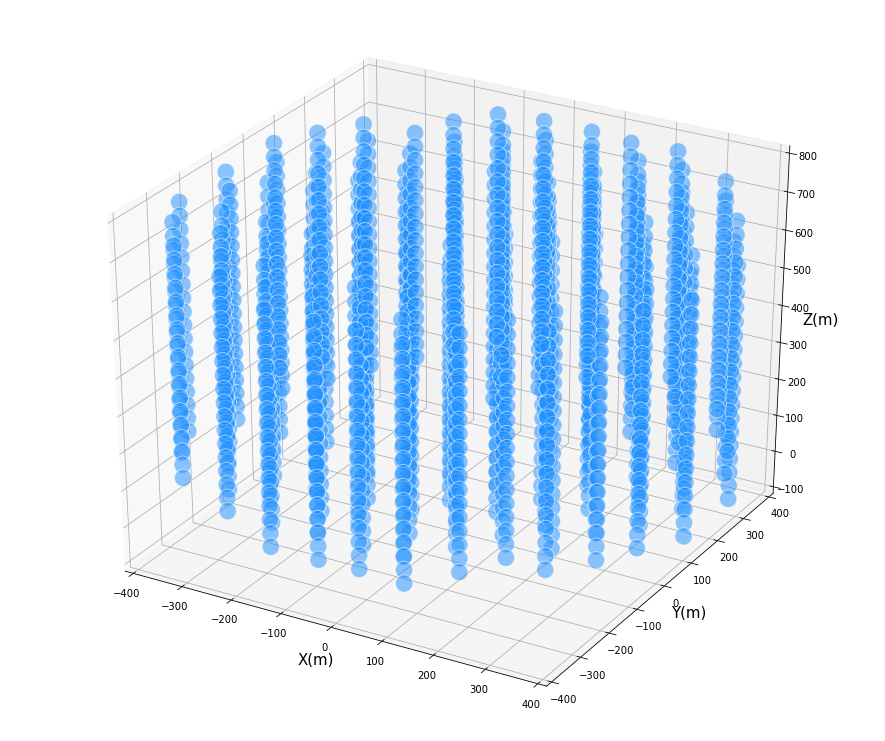

In [22]:
% matplotlib inline
mpl_plot_detector()


In [23]:
from utility_plot_functions import mpl_evt_plot

In [42]:
# %load utility_plot_functions
from detector_positions import structured_positions


def mpl_plot_detector(**kwargs):
    detfile = "utilities/km3net_jul13_90m.detx"
    doms, pmts = structured_positions(detfile)
    
    """
    Function to show all of the doms in the (complete) detector
    The axes limits are set to display the whole detector
    
    Returns:
    --------
    ax : matplotlib Axes3D
    """
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(12,10))
    ax = Axes3D(fig)
    ax.set_xlim(-400,400)
    ax.set_ylim(-400,400)
    ax.set_zlim(-100,800)
    ax.set_xlabel('X(m)',size=15)
    ax.set_ylabel('Y(m)',size=15)
    ax.set_zlabel('Z(m)',size=15)
    ax.scatter(doms['x'], doms['y'], doms['z'], color="dodgerblue" , alpha=0.60, s=300, 
               c="steelblue", edgecolors="cornflowerblue")
    #color='#A2D4FF'
    return ax

def mpl_evt_plot(evt, doms_hit, norm_times, mc_positions_0, mc_positions_1,**kwargs):
    detfile = "utilities/km3net_jul13_90m.detx"
    doms, pmts = structured_positions(detfile)
    
    
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    
    fig = plt.figure(figsize=(12,8))
    fig.suptitle('Hits on DOMs',size=15)
    ax = Axes3D(fig)
    ax.set_xlim(-400,400)
    ax.set_ylim(-400,400)
    ax.set_zlim(-100,800)

    ax.set_xlabel('X(m)',size=15)
    ax.set_ylabel('Y(m)',size=15)
    ax.set_zlabel('Z(m)',size=15)
    ax.scatter(doms['x'], doms['y'], doms['z'], alpha=0.1, s=200,
              c="steelblue", edgecolors="cornflowerblue")
               #color="dodgerblue" edgecolors='turquoise')
    
    def scatter(evt, doms_hit, times):#, color=(random.random(), random.random(), random.random())):
      
        """
        Function to plot a numucc event as the hit doms in the evt.
        The color scale from blue to red shows the hit times. Event starts at blue and ends in red

        Parameters:
        -----------
        evt : np.int
             event id to plot
        doms_hit : np.ndarray
            array containing the doms hit positions per event
        times : np.ndarray
            array containing the times of the hits 
        
        Returns:
        --------
        scatter : matplotlib ax.scatter
            scatter plot of the chosen event  
        """
    
        return ax.scatter(doms_hit[evt]['x'],
                          doms_hit[evt]['y'],
                          doms_hit[evt]['z'],
            color=cm.bwr(norm_times[evt]),s=200, alpha=0.9, edgecolor="gray")
    
    def mc_points(evt, mc_positions_0, mc_positions_1):
       
        """
        Function to plot the mc event: start point, end point, track
        The color scale from blue to red shows the hit times. Event starts at blue and ends in red

        Parameters:
        -----------
        evt : np.int
             event id to plot
        mc_positions : np.ndarray
            numpy array of the 3D positions of the mc events: mc_positions[0] is the start positions; mc_positions[1] 
            is the ending position of the track
        Returns:
        --------
    
        """
        start = ax.scatter(mc_positions_0[evt]['x'], mc_positions_0[evt]['y'], mc_positions_0[evt]['z'], 
                           color="blue", marker = '*', s=100), 
        end = ax.scatter(mc_positions_1[evt]['x'], mc_positions_1[evt]['y'], mc_positions_1[evt]['z'], 
                         color="red", marker = '>',  s=100)
        #arrows = ax.quiver(mu_start[evt]['x'], mu_start[evt]['y'], mu_start[evt]['z'], 
        #                  mu_end[evt]['x'], mu_end[evt]['y'], mu_end[evt]['z'], length=trks_len[evt])
        lines = ax.plot([mc_positions_0[evt]['x'], mc_positions_1[evt]['x']],
                        [mc_positions_0[evt]['y'], mc_positions_1[evt]['y']], 
                        zs=[mc_positions_0[evt]['z'], mc_positions_1[evt]['z']])
        return
    
    
    def event(evt):
    
        """
        Function to plot a numucc event as the hit doms in the evt.
        The color scale from blue to red shows the hit times. Event starts at blue and ends in red

        Parameters:
        -----------
        evt : np.int
             event id to plot
        Returns:
        --------
        plot : matplotlib scatter
            scatter plot of the chosen numucc event  
        mc : mc_points 
            scatter plot of start and end position according to mc and line to display the mc track
        """
      
        plot = scatter(evt, doms_hit, norm_times)
        mc = mc_points(evt, mc_positions_0, mc_positions_1)
        plt.show()
        return plot, mc
    return event(evt)

In [43]:
sel = np.load("/data/km3net/Xy_multi_data_files/numu_1_sel5_doms_map.npz")["id"]

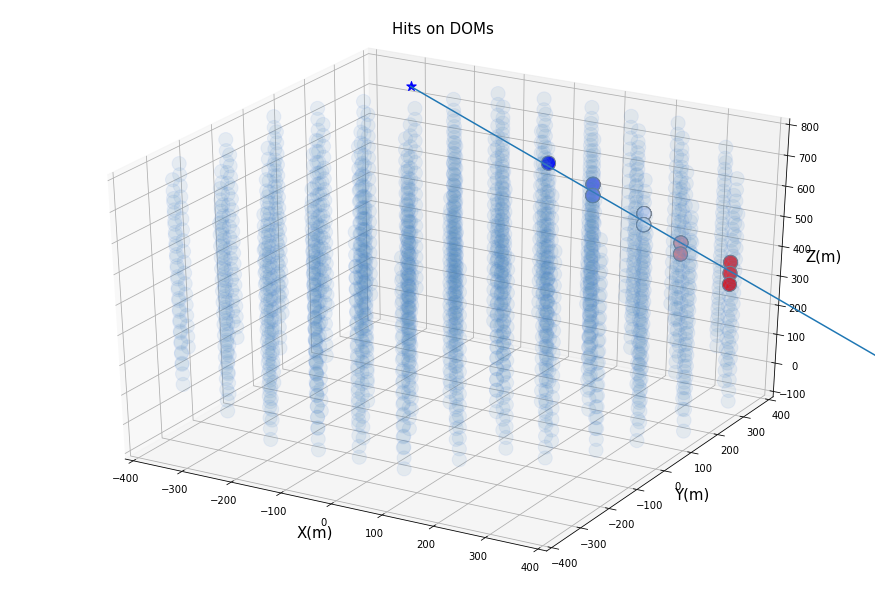

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7fac62310310>, None)

In [44]:
mpl_evt_plot(777, doms_hit_numu[sel], norm_times_numu[sel], 
                                    muon_positions[0][sel], muon_positions[1][sel])

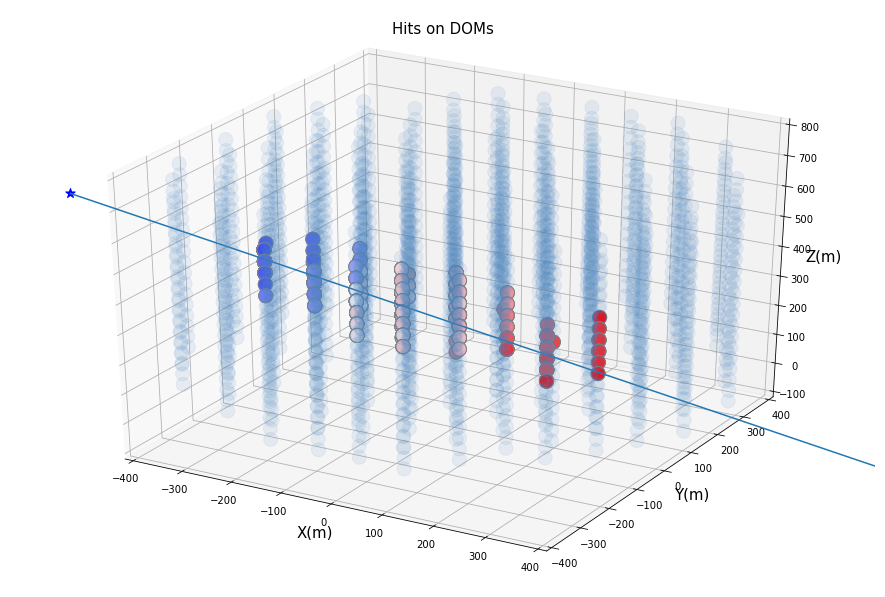

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7fac61d0fc10>, None)

In [45]:
mpl_evt_plot(1008, doms_hit_numu[sel], norm_times_numu[sel], 
                                    muon_positions[0][sel], muon_positions[1][sel])

In [49]:
sel_nue = np.load("/data/km3net/Xy_multi_data_files/nue_1_sel_5_doms_map.npz")["id"]

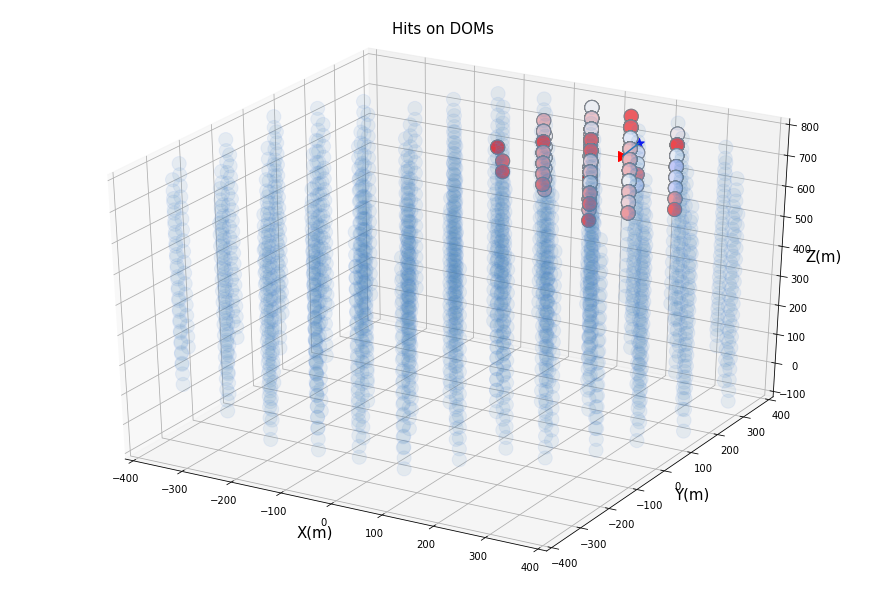

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x7fac61f32410>, None)

In [51]:
mpl_evt_plot(936, doms_hit_nue[sel_nue], norm_times_nue[sel_nue], 
                                    electron_positions[0][sel_nue], electron_positions[1][sel_nue])

### plot the detector footprint

AttributeError: 'Figure' object has no attribute 'set_xlabel'

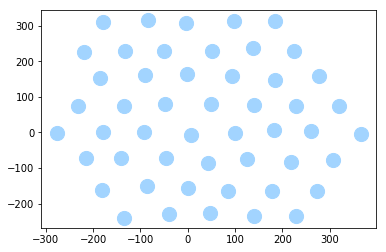

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
#plt.scatter(doms['x'], doms['y'], color='#A2D4FF', alpha=1, s=20)
plt.scatter(doms[[range(0,2070,18)[:50]]]['x'], doms[[range(0,2070,18)[:50]]]['y'], color='#A2D4FF', alpha=1, s=200)
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')
fig.suptitle('Detector X-Y view')
plt.grid()
plt.show()
